In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_columns',None)


In [2]:
df =pd.read_excel(r"C:\Users\vinoth.k\Downloads\Application Status Data.xlsx")


In [3]:
df.head()

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP
0,1292862,19,Request for Property Ownership,27-AUG-2015 00:00:00,1,308,STEP_01,14-FEB-2017 11:35:44
1,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,308,STEP_01,02-OCT-2017 13:03:26
2,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,309,STEP_02,03-OCT-2017 12:52:35
3,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,310,STEP_03,03-OCT-2017 12:52:47
4,1292863,19,Request for Property Ownership,27-AUG-2015 00:00:00,18,311,STEP_04,03-OCT-2017 12:52:54


In [4]:
# shape of the dataframe
df.shape

(381240, 8)

In [5]:
# data type of each column
df.dtypes

APLN_NO                    int64
APLN_CODE                  int64
APLN_DESC                 object
APLN_DATE                 object
CURR_STEP                  int64
ACTN_CODE                  int64
ACTN_CODE_STEP            object
LAST_UPDATED_TIMESTAMP    object
dtype: object

In [6]:
# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381240 entries, 0 to 381239
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   APLN_NO                 381240 non-null  int64 
 1   APLN_CODE               381240 non-null  int64 
 2   APLN_DESC               381240 non-null  object
 3   APLN_DATE               381240 non-null  object
 4   CURR_STEP               381240 non-null  int64 
 5   ACTN_CODE               381240 non-null  int64 
 6   ACTN_CODE_STEP          381240 non-null  object
 7   LAST_UPDATED_TIMESTAMP  381240 non-null  object
dtypes: int64(4), object(4)
memory usage: 23.3+ MB


In [7]:
df.isnull().sum()

APLN_NO                   0
APLN_CODE                 0
APLN_DESC                 0
APLN_DATE                 0
CURR_STEP                 0
ACTN_CODE                 0
ACTN_CODE_STEP            0
LAST_UPDATED_TIMESTAMP    0
dtype: int64

In [8]:
df.describe()

,APLN_NO,APLN_CODE,CURR_STEP,ACTN_CODE
count,3.812400e+05,381240.0,381240.000000,381240.000000
mean,1.331660e+06,19.0,16.787294,314.017970
std,3.175127e+04,0.0,6.073463,14.440576
min,1.292862e+06,19.0,0.000000,220.000000
25%,1.306618e+06,19.0,14.000000,310.000000
50%,1.325299e+06,19.0,21.000000,315.000000
75%,1.340359e+06,19.0,21.000000,321.000000
max,1.435755e+06,19.0,21.000000,328.000000


In [9]:
for i in df.columns:
    print("------------------------")
    print(i)
    print(df[i].unique())
    

------------------------
APLN_NO
[1292862 1292863 1292864 ... 1435576 1435713 1435755]
------------------------
APLN_CODE
[19]
------------------------
APLN_DESC
['Request for Property Ownership']
------------------------
APLN_DATE
['27-AUG-2015 00:00:00' '01-JUN-2015 00:00:00' '30-AUG-2015 00:00:00' ...
 '29-AUG-2019 00:00:00' '02-SEP-2019 00:00:00' '03-SEP-2019 00:00:00']
------------------------
CURR_STEP
[ 1 18 21 15 19  7 14  6 20 16 13  2 10  8 11  4  5  3  9 12 17  0]
------------------------
ACTN_CODE
[308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 220]
------------------------
ACTN_CODE_STEP
['STEP_01' 'STEP_02' 'STEP_03' 'STEP_04' 'STEP_05' 'STEP_06' 'STEP_07'
 'STEP_08' 'STEP_09' 'STEP_10' 'STEP_11' 'STEP_12' 'STEP_13' 'STEP_14'
 'STEP_15' 'STEP_16' 'STEP_17' 'STEP_18' 'STEP_19' 'STEP_20' 'STEP_21'
 'STEP_22']
------------------------
LAST_UPDATED_TIMESTAMP
['14-FEB-2017 11:35:44' '02-OCT-2017 13:03:26' '03-OCT-2017 12:52:35' ...
 '03-SE

In [10]:
df['APLN_DATE'] = pd.to_datetime(df['APLN_DATE'])
df['LAST_UPDATED_TIMESTAMP'] = pd.to_datetime(df['LAST_UPDATED_TIMESTAMP'])

In [11]:
df.head()

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP
0,1292862,19,Request for Property Ownership,2015-08-27,1,308,STEP_01,2017-02-14 11:35:44
1,1292863,19,Request for Property Ownership,2015-08-27,18,308,STEP_01,2017-10-02 13:03:26
2,1292863,19,Request for Property Ownership,2015-08-27,18,309,STEP_02,2017-10-03 12:52:35
3,1292863,19,Request for Property Ownership,2015-08-27,18,310,STEP_03,2017-10-03 12:52:47
4,1292863,19,Request for Property Ownership,2015-08-27,18,311,STEP_04,2017-10-03 12:52:54


In [12]:
pivoted = df.pivot(index='APLN_NO', columns='ACTN_CODE_STEP', values=['ACTN_CODE','LAST_UPDATED_TIMESTAMP'])

In [13]:
pivoted.columns = ['_'.join(str(s).strip() for s in col if s) for col in pivoted.columns]

In [14]:
pivoted.columns.name=None

In [15]:
print(pivoted)

        ACTN_CODE_STEP_01 ACTN_CODE_STEP_02 ACTN_CODE_STEP_03  \
APLN_NO                                                         
1292862               308               NaN               NaN   
1292863               308               309               310   
1292864               308               NaN               NaN   
1292865               308               309               310   
1292866               308               NaN               NaN   
...                   ...               ...               ...   
1435509               308               NaN               NaN   
1435527               308               NaN               NaN   
1435576               308               NaN               NaN   
1435713               308               NaN               NaN   
1435755               308               NaN               NaN   

        ACTN_CODE_STEP_04 ACTN_CODE_STEP_05 ACTN_CODE_STEP_06  \
APLN_NO                                                         
1292862               Na

In [16]:
dfnew = pd.merge(df,pivoted, on=["APLN_NO", "APLN_NO"])

In [17]:
dfnew.head(5)

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP,ACTN_CODE_STEP_01,ACTN_CODE_STEP_02,ACTN_CODE_STEP_03,ACTN_CODE_STEP_04,ACTN_CODE_STEP_05,ACTN_CODE_STEP_06,ACTN_CODE_STEP_07,ACTN_CODE_STEP_08,ACTN_CODE_STEP_09,ACTN_CODE_STEP_10,ACTN_CODE_STEP_11,ACTN_CODE_STEP_12,ACTN_CODE_STEP_13,ACTN_CODE_STEP_14,ACTN_CODE_STEP_15,ACTN_CODE_STEP_16,ACTN_CODE_STEP_17,ACTN_CODE_STEP_18,ACTN_CODE_STEP_19,ACTN_CODE_STEP_20,ACTN_CODE_STEP_21,ACTN_CODE_STEP_22,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22
0,1292862,19,Request for Property Ownership,2015-08-27,1,308,STEP_01,2017-02-14 11:35:44,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-14 11:35:44,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,1292863,19,Request for Property Ownership,2015-08-27,18,308,STEP_01,2017-10-02 13:03:26,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
2,1292863,19,Request for Property Ownership,2015-08-27,18,309,STEP_02,2017-10-03 12:52:35,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
3,1292863,19,Request for Property Ownership,2015-08-27,18,310,STEP_03,2017-10-03 12:52:47,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT
4,1292863,19,Request for Property Ownership,2015-08-27,18,311,STEP_04,2017-10-03 12:52:54,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT


In [18]:
dfnew['ACTN_CODE_STEP'].value_counts()

STEP_01    43956
STEP_02    24430
STEP_03    23359
STEP_04    22914
STEP_05    22623
STEP_06    22003
STEP_07    19142
STEP_08    17371
STEP_09    16974
STEP_10    16806
STEP_11    16468
STEP_12    15965
STEP_13    15710
STEP_14    15157
STEP_15    13825
STEP_16    13448
STEP_17    12969
STEP_18    12891
STEP_19     9998
STEP_20     9026
STEP_21     8863
STEP_22     7342
Name: ACTN_CODE_STEP, dtype: int64

In [19]:
dfnew['step18to22'] =(dfnew['LAST_UPDATED_TIMESTAMP_STEP_22'].sub(dfnew['LAST_UPDATED_TIMESTAMP_STEP_18'],axis=0)).dt.days

In [20]:
dfnew.head(30)

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP,LAST_UPDATED_TIMESTAMP,ACTN_CODE_STEP_01,ACTN_CODE_STEP_02,ACTN_CODE_STEP_03,ACTN_CODE_STEP_04,ACTN_CODE_STEP_05,ACTN_CODE_STEP_06,ACTN_CODE_STEP_07,ACTN_CODE_STEP_08,ACTN_CODE_STEP_09,ACTN_CODE_STEP_10,ACTN_CODE_STEP_11,ACTN_CODE_STEP_12,ACTN_CODE_STEP_13,ACTN_CODE_STEP_14,ACTN_CODE_STEP_15,ACTN_CODE_STEP_16,ACTN_CODE_STEP_17,ACTN_CODE_STEP_18,ACTN_CODE_STEP_19,ACTN_CODE_STEP_20,ACTN_CODE_STEP_21,ACTN_CODE_STEP_22,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22
0,1292862,19,Request for Property Ownership,2015-08-27,1,308,STEP_01,2017-02-14 11:35:44,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-14 11:35:44,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN
1,1292863,19,Request for Property Ownership,2015-08-27,18,308,STEP_01,2017-10-02 13:03:26,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,NaN
2,1292863,19,Request for Property Ownership,2015-08-27,18,309,STEP_02,2017-10-03 12:52:35,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,NaN
3,1292863,19,Request for Property Ownership,2015-08-27,18,310,STEP_03,2017-10-03 12:52:47,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,NaN
4,1292863,19,Request for Property Ownership,2015-08-27,18,311,STEP_04,2017-10-03 12:52:54,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,NaN
5,1292863,19,Request for Property Ownership,2015-08-27,18,312,STEP_05,2017-10-03 12:53:01,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09

#As we transformed the row value to column we can remove rest of the rows for each application number

In [21]:
dfnew= dfnew.groupby('APLN_NO').nth(0) 

#Removing coulmns which ever not required after creating new idv's(idependent variable)

In [22]:
dfnew= dfnew.drop(['ACTN_CODE_STEP', 'LAST_UPDATED_TIMESTAMP'], axis = 1) 

In [23]:
predictdataset = dfnew.loc[dfnew['CURR_STEP'] == 18]

In [24]:
predictdataset

,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP_01,ACTN_CODE_STEP_02,ACTN_CODE_STEP_03,ACTN_CODE_STEP_04,ACTN_CODE_STEP_05,ACTN_CODE_STEP_06,ACTN_CODE_STEP_07,ACTN_CODE_STEP_08,ACTN_CODE_STEP_09,ACTN_CODE_STEP_10,ACTN_CODE_STEP_11,ACTN_CODE_STEP_12,ACTN_CODE_STEP_13,ACTN_CODE_STEP_14,ACTN_CODE_STEP_15,ACTN_CODE_STEP_16,ACTN_CODE_STEP_17,ACTN_CODE_STEP_18,ACTN_CODE_STEP_19,ACTN_CODE_STEP_20,ACTN_CODE_STEP_21,ACTN_CODE_STEP_22,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22
APLN_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1292863,19,Request for Property Ownership,2015-08-27,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,NaN
1292868,19,Request for Property Ownership,2015-08-27,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2018-05-20 10:42:28,2018-07-29 08:43:10,2018-07-29 08:44:33,2018-08-07 18:29:13,2018-08-07 18:29:23,2018-08-07 18:32:07,2018-08-09 14:32:08,2018-08-09 14:34:41,2018-08-09 14:35:00,2018-08-09 14:35:24,2018-08-12 11:16:42,2018-08-12 12:19:20,2018-08-16 10:59:01,2018-09-10 08:15:57,2018-11-08 08:03:18,2018-11-11 08:49:49,2018-11-13 07:06:06,2018-11-14 08:20:26,NaT,NaT,NaT,NaT,NaN
1292887,19,Request for Property Ownership,2015-08-27,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2016-08-15 11:01:52,2017-06-19 10:03:37,2017-06-21 10:04:27,2017-07-09 13:05:15,2017-07-17 12:32:16,2017-07-18 08:14:22,2017-08-17 10:34:35,2017-08-17 10:37:05,2017-08-17 10:41:37,2017-08-30 10:00:51,2017-10-16 14:24:13,2017-10-16 14:24:35,2017-10-19 10:30:51,2018-02-04 10:29:17,2018-05-23 13:19:46,2018-05-23 17:49:49,2018-07-02 06:52:47,2018-07-09 13:51:17,NaT,NaT,NaT,NaT,NaN
1292925,19,Request for Property Ownership,2015-08-30,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2016-08-28 07:50:45,2017-06-04 11:20:33,2017-06-07 12:44:30,2017-11-27 09:42:31,2017-11-27 09:53:30,2017-12-06 09:30:49,2017-12-06 09:36:19,2017-12-06 09:37:13,2017-12-06 09:37:42,2017-12-12 09:58:32,2017-12-18 12:51:51,2017-12-19 09:10:43,2017-12-21 10:37:28,2018-01-18 09:08:35,2018-01-29 10:30:18,2018-02-04 09:31:00,2018-02-18 08:35:42,2018-02-25 14:43:14,NaT,NaT,NaT,NaT,NaN
1292943,19,Request for Property Ownership,2015-08-30,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-04-04 07:59:56,2018-01-30 13:37:17,2018-02-11 12:57:11,2018-02-13 09:05:15,2018-02-14 10:13:22,2018-02-28 10:16:50,2018-03-01 10:05:23,2018-09-04 10:26:49,2018-09-04 10:27:26,2018-09-10 12:43:44,2018-09-10 12:49:03,2018-09-10 12:55:02,2018-09-12 10:04:23,2018-09-27 08:21:10,2018-10-04 09:02:11,2018-10-22 07:05:58,2018-10-29 13:05:21,2018-10-31 14:42:11,NaT,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

#Creating Train dataset by removing the rows which  have null for this column step18to22 i.e(dv or target variable)

In [25]:
dfnew =dfnew.dropna(subset=['step18to22'])

In [26]:
dfnew

,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP_01,ACTN_CODE_STEP_02,ACTN_CODE_STEP_03,ACTN_CODE_STEP_04,ACTN_CODE_STEP_05,ACTN_CODE_STEP_06,ACTN_CODE_STEP_07,ACTN_CODE_STEP_08,ACTN_CODE_STEP_09,ACTN_CODE_STEP_10,ACTN_CODE_STEP_11,ACTN_CODE_STEP_12,ACTN_CODE_STEP_13,ACTN_CODE_STEP_14,ACTN_CODE_STEP_15,ACTN_CODE_STEP_16,ACTN_CODE_STEP_17,ACTN_CODE_STEP_18,ACTN_CODE_STEP_19,ACTN_CODE_STEP_20,ACTN_CODE_STEP_21,ACTN_CODE_STEP_22,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22
APLN_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1292865,19,Request for Property Ownership,2015-08-27,21,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,220,2016-08-15 11:02:52,2017-12-14 12:03:07,2018-01-07 09:14:19,2018-01-08 11:46:36,2018-01-08 11:56:45,2018-01-08 13:07:29,2018-01-29 12:58:02,2018-02-01 09:32:40,2018-02-01 09:33:02,2018-02-08 09:10:43,2018-02-08 10:28:26,2018-02-08 10:32:07,2018-02-11 11:37:41,2018-02-15 09:27:19,2018-03-18 09:47:44,2018-03-21 09:13:36,2018-03-28 07:16:25,2018-04-01 12:52:30,2018-04-02 12:38:02,2018-05-15 09:19:09,2018-05-15 14:17:54,2018-06-04 10:24:34,63.0
1292870,19,Request for Property Ownership,2015-08-27,21,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,220,2016-07-25 07:47:16,2018-03-20 14:17:56,2018-05-08 14:35:30,2018-05-08 14:52:04,2018-05-08 14:55:10,2018-05-10 10:31:59,2018-05-10 11:37:11,2018-05-23 15:01:21,2018-05-23 15:50:56,2018-06-26 13:27:32,2018-07-04 12:51:27,2018-07-05 08:28:28,2018-07-05 10:46:46,2018-07-09 08:35:24,2018-07-09 13:39:47,2018-07-10 08:19:23,2018-07-29 14:43:38,2018-08-06 13:23:25,2018-08-16 13:37:11,2018-09-16 09:18:09,2018-09-19 10:34:03,2018-10-28 11:42:03,82.0
1292873,19,Request for Property Ownership,2015-08-27,21,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,220,2018-06-04 10:38:19,2018-06-04 11:43:09,2018-06-26 10:37:18,2018-07-18 13:20:32,2018-07-18 13:22:17,2018-07-18 13:24:24,2018-09-05 07:56:35,2018-09-05 08:18:10,2018-09-05 08:18:25,2018-09-10 09:19:59,2018-09-10 10:48:11,2018-09-10 11:07:59,2018-09-13 10:19:29,2018-09-27 08:21:13,2018-10-21 07:41:39,2018-10-22 07:27:27,2018-11-01 11:54:19,2018-11-04 08:18:57,2018-11-04 10:23:14,2018-11-14 11:17:50,2018-11-15 08:08:18,2018-11-25 10:59:32,21.0
1292880,19,Request for Property Ownership,2015-08-27,21,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,220,2017-10-18 09:21:09,2018-02-28 13:13:36,2018-03-18 09:10:16,2018-03-18 13:08:59,2018-03-18 13:14:55,2018-03-18 13:33:33,2018-05-22 10:44:36,2018-05-22 12:11:55,2018-05-22 12:16:44,2018-05-22 14:17:21,2018-08-01 12:33:18,2018-08-01 12:40:45,2018-08-02 09:27:39,2018-09-10 08:19:53,2018-10-04 08:31:20,2018-10-22 06:56:55,2018-11-01 08:00:48,2018-11-04 09:28:41,2018-11-29 11:40:45,2018-12-13 08:40:06,2018-12-13 08:51:20,2018-12-23 09:45:02,49.0
1292881,19,Request for Property Ownership,2015-08-27,21,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,220,2017-07-17 12:45:48,2017-10-30 14:55:55,2017-11-20 08:53:16,2017-11-21 09:31:39,2017-12-06 12:30:34,2017-12-19 09:51:38,2018-01-04 12:42:14,2018-01-09 09:32:45,2018-01-09 09:33:29,2018-01-09 09:33:47,2018-01-09 10:26:31,2018-01-29 08:46:49,2018-01-31 12:19:57,2018-02-04 09:13:51,20

#Removing the unwanted columns

In [27]:
drop_cols = ['APLN_CODE','APLN_DESC','CURR_STEP', 'ACTN_CODE']
dfnew.reset_index(drop=True, inplace=True)
dfnew.drop(drop_cols, axis = 1, inplace = True)

In [28]:
for i in dfnew.columns:
    
    if 'ACTN_CODE' in i:
        
      dfnew.drop(i, axis = 1, inplace = True)

In [29]:
dfnew['start_date'] = (dfnew['LAST_UPDATED_TIMESTAMP_STEP_01'] - dfnew['APLN_DATE']).dt.days
dfnew['first_interval'] = (dfnew['LAST_UPDATED_TIMESTAMP_STEP_06'] - dfnew['LAST_UPDATED_TIMESTAMP_STEP_01']).dt.days
dfnew['second_interval'] = (dfnew['LAST_UPDATED_TIMESTAMP_STEP_12'] - dfnew['LAST_UPDATED_TIMESTAMP_STEP_06']).dt.days
dfnew['third_interval'] = (dfnew['LAST_UPDATED_TIMESTAMP_STEP_18'] - dfnew['LAST_UPDATED_TIMESTAMP_STEP_12']).dt.days

In [30]:
final_df  = dfnew[['start_date','first_interval','second_interval','third_interval','step18to22']]

In [31]:
#CREATE TRAIN DATA SET
dfnew =dfnew.dropna(subset=['step18to22'])

#renaming the column name step18to22 as dv

In [32]:
final_df.columns = ['start_date', 'first_interval', 'second_interval', 'third_interval','dv']

In [33]:
final_df.head()

,start_date,first_interval,second_interval,third_interval,dv
0,354.0,511.0,30.0,52.0,63.0
1,333.0,654.0,55.0,32.0,82.0
2,1012.0,44.0,53.0,54.0,21.0
3,783.0,151.0,135.0,94.0,49.0
4,690.0,154.0,40.0,62.0,241.0


Correlaation Matrix

In [34]:
import seaborn as sns

Var_Corr = final_df.corr()['dv'][:-1]


In [35]:
Var_Corr

start_date         0.077939
first_interval    -0.043377
second_interval   -0.172481
third_interval    -0.046916
Name: dv, dtype: float64

In [36]:
Var_Corr = final_df.corr()

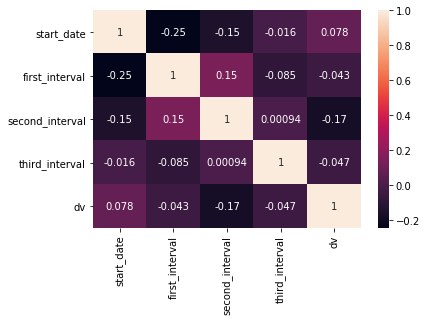

In [37]:
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [38]:
#Checking whether any outliers are present or not

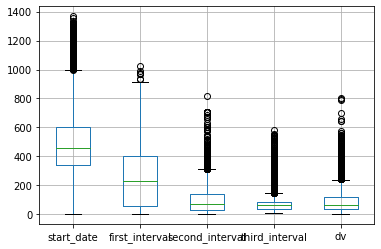

In [39]:
final_df.boxplot()

#Outliers are present so capping instead of removing

In [40]:
def outlier_Capping(dev):
    
    for col in dev.columns:
        
        Q1 = dev[col].quantile(0.25)
        Q3 = dev[col].quantile(0.75)
        IQR = Q3-Q1

 

        UW = Q3 + (1.5*IQR)
        LW = Q1 - (1.5*IQR)

 

        dev[col] = np.where(dev[col] < LW, LW, dev[col])
        dev[col] = np.where(dev[col] > UW, UW, dev[col])
        
    return dev

In [41]:
final_df = outlier_Capping(final_df)

C:\Users\vinoth.k\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\vinoth.k\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
#Boxplot after outliers capping

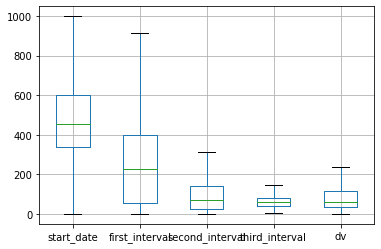

In [43]:
final_df.boxplot()

In [44]:

final_df.describe()

,start_date,first_interval,second_interval,third_interval,dv
count,7341.000000,7341.000000,7341.000000,7341.000000,7342.000000
mean,476.604686,255.229533,92.589974,62.954979,83.044947
std,262.888573,217.076319,82.409476,31.785366,64.375401
min,0.000000,0.000000,0.000000,7.000000,0.000000
25%,339.000000,56.000000,26.000000,38.000000,33.000000
50%,454.000000,229.000000,71.000000,60.000000,63.000000
75%,603.000000,400.000000,140.000000,81.000000,115.000000
max,999.000000,916.000000,311.000000,145.500000,238.000000


In [45]:
#Model Building

In [46]:
import xgboost

model = xgboost.XGBRegressor()

In [47]:
X_train = final_df.drop('dv', axis = 1)
y_train = final_df['dv']

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [49]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
y_pred_dev = model.predict(X_train)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error,f1_score
print("train r2 : ", r2_score(y_train, y_pred_dev))

train r2 :  0.689979365486004


In [53]:
print("mean_squared_error : ", mean_squared_error(y_train, y_pred_dev))

mean_squared_error :  1284.6101138312576


In [54]:
from math import sqrt

In [55]:
print("rms  : ", sqrt(mean_squared_error(y_train, y_pred_dev)))

rms  :  35.841458031604375


# Use Case for the scenario

We need to predict the number of days which the application would take to complete from Step 18 to Step 22.
Identify all the application which are currently at Stage 18 and provide
the prediction (in terms of days) for them to complete Step 22.
This will help us to identify the closure time.

In [56]:
#Prepare predict data

predictdataset['start_date'] = (predictdataset['LAST_UPDATED_TIMESTAMP_STEP_01'] - predictdataset['APLN_DATE']).dt.days
predictdataset['first_interval'] = (predictdataset['LAST_UPDATED_TIMESTAMP_STEP_06'] - predictdataset['LAST_UPDATED_TIMESTAMP_STEP_01']).dt.days
predictdataset['second_interval'] = (predictdataset['LAST_UPDATED_TIMESTAMP_STEP_12'] - predictdataset['LAST_UPDATED_TIMESTAMP_STEP_06']).dt.days
predictdataset['third_interval'] = (predictdataset['LAST_UPDATED_TIMESTAMP_STEP_18'] - predictdataset['LAST_UPDATED_TIMESTAMP_STEP_12']).dt.days

In [57]:
predictdataset

,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,ACTN_CODE_STEP_01,ACTN_CODE_STEP_02,ACTN_CODE_STEP_03,ACTN_CODE_STEP_04,ACTN_CODE_STEP_05,ACTN_CODE_STEP_06,ACTN_CODE_STEP_07,ACTN_CODE_STEP_08,ACTN_CODE_STEP_09,ACTN_CODE_STEP_10,ACTN_CODE_STEP_11,ACTN_CODE_STEP_12,ACTN_CODE_STEP_13,ACTN_CODE_STEP_14,ACTN_CODE_STEP_15,ACTN_CODE_STEP_16,ACTN_CODE_STEP_17,ACTN_CODE_STEP_18,ACTN_CODE_STEP_19,ACTN_CODE_STEP_20,ACTN_CODE_STEP_21,ACTN_CODE_STEP_22,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22,start_date,first_interval,second_interval,third_interval
APLN_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1292863,19,Request for Property Ownership,2015-08-27,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,NaN,767.0,0.0,13.0,531
1292868,19,Request for Property Ownership,2015-08-27,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2018-05-20 10:42:28,2018-07-29 08:43:10,2018-07-29 08:44:33,2018-08-07 18:29:13,2018-08-07 18:29:23,2018-08-07 18:32:07,2018-08-09 14:32:08,2018-08-09 14:34:41,2018-08-09 14:35:00,2018-08-09 14:35:24,2018-08-12 11:16:42,2018-08-12 12:19:20,2018-08-16 10:59:01,2018-09-10 08:15:57,2018-11-08 08:03:18,2018-11-11 08:49:49,2018-11-13 07:06:06,2018-11-14 08:20:26,NaT,NaT,NaT,NaT,NaN,997.0,79.0,4.0,93
1292887,19,Request for Property Ownership,2015-08-27,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2016-08-15 11:01:52,2017-06-19 10:03:37,2017-06-21 10:04:27,2017-07-09 13:05:15,2017-07-17 12:32:16,2017-07-18 08:14:22,2017-08-17 10:34:35,2017-08-17 10:37:05,2017-08-17 10:41:37,2017-08-30 10:00:51,2017-10-16 14:24:13,2017-10-16 14:24:35,2017-10-19 10:30:51,2018-02-04 10:29:17,2018-05-23 13:19:46,2018-05-23 17:49:49,2018-07-02 06:52:47,2018-07-09 13:51:17,NaT,NaT,NaT,NaT,NaN,354.0,336.0,90.0,265
1292925,19,Request for Property Ownership,2015-08-30,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2016-08-28 07:50:45,2017-06-04 11:20:33,2017-06-07 12:44:30,2017-11-27 09:42:31,2017-11-27 09:53:30,2017-12-06 09:30:49,2017-12-06 09:36:19,2017-12-06 09:37:13,2017-12-06 09:37:42,2017-12-12 09:58:32,2017-12-18 12:51:51,2017-12-19 09:10:43,2017-12-21 10:37:28,2018-01-18 09:08:35,2018-01-29 10:30:18,2018-02-04 09:31:00,2018-02-18 08:35:42,2018-02-25 14:43:14,NaT,NaT,NaT,NaT,NaN,364.0,465.0,12.0,68
1292943,19,Request for Property Ownership,2015-08-30,18,308,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,NaN,NaN,NaN,NaN,2017-04-04 07:59:56,2018-01-30 13:37:17,2018-02-11 12:57:11,2018-02-13 09:05:15,2018-02-14 10:13:22,2018-02-28 10:16:50,2018-03-01 10:05:23,2018-09-04 10:26:49,2018-09-04 10:27:26,2018-09-10 12:43:44,2018-09-10 12:49:03,2018-09-10 12:55:02,2018-09-12 10:04:23,2018-09-27 08:21:10,2018-10-04 09:02:11,2018-10-22 07:05:58,2018-10-29 13:05:21,2018-10-31 14:42:11,NaT,NaT,NaT,NaT,NaN,583.0,330.0,194.0,51
..

In [58]:
for i in predictdataset.columns:
    
    if 'ACTN_CODE_' in i:
        
      predictdataset.drop(i, axis = 1, inplace = True)

In [59]:
predictdataset = predictdataset.reset_index()

In [60]:
finalPredictset = predictdataset[['start_date','first_interval','second_interval','third_interval']]

In [61]:
finalPredictset= finalPredictset

In [62]:
daysprediction = model.predict(scaler.transform(finalPredictset))

In [63]:
daysprediction

array([177.36252 , 115.08174 , 103.52709 , ...,  23.033314,  70.08431 ,
        36.260254], dtype=float32)

In [64]:
fpr = pd.DataFrame(daysprediction,columns = ['output'])

In [65]:
fpr

,output
0,177.362518
1,115.081741
2,103.527092
3,52.151196
4,74.169212
...,...
3017,65.201912
3018,52.556221
3019,23.033314
3020,70.084312


In [66]:
predictdataset['step18to22']=fpr

In [67]:


predictdataset

,APLN_NO,APLN_CODE,APLN_DESC,APLN_DATE,CURR_STEP,ACTN_CODE,LAST_UPDATED_TIMESTAMP_STEP_01,LAST_UPDATED_TIMESTAMP_STEP_02,LAST_UPDATED_TIMESTAMP_STEP_03,LAST_UPDATED_TIMESTAMP_STEP_04,LAST_UPDATED_TIMESTAMP_STEP_05,LAST_UPDATED_TIMESTAMP_STEP_06,LAST_UPDATED_TIMESTAMP_STEP_07,LAST_UPDATED_TIMESTAMP_STEP_08,LAST_UPDATED_TIMESTAMP_STEP_09,LAST_UPDATED_TIMESTAMP_STEP_10,LAST_UPDATED_TIMESTAMP_STEP_11,LAST_UPDATED_TIMESTAMP_STEP_12,LAST_UPDATED_TIMESTAMP_STEP_13,LAST_UPDATED_TIMESTAMP_STEP_14,LAST_UPDATED_TIMESTAMP_STEP_15,LAST_UPDATED_TIMESTAMP_STEP_16,LAST_UPDATED_TIMESTAMP_STEP_17,LAST_UPDATED_TIMESTAMP_STEP_18,LAST_UPDATED_TIMESTAMP_STEP_19,LAST_UPDATED_TIMESTAMP_STEP_20,LAST_UPDATED_TIMESTAMP_STEP_21,LAST_UPDATED_TIMESTAMP_STEP_22,step18to22,start_date,first_interval,second_interval,third_interval
0,1292863,19,Request for Property Ownership,2015-08-27,18,308,2017-10-02 13:03:26,2017-10-03 12:52:35,2017-10-03 12:52:47,2017-10-03 12:52:54,2017-10-03 12:53:01,2017-10-03 12:53:09,2017-10-05 09:59:21,2017-10-05 10:00:24,2017-10-05 10:00:41,2017-10-05 10:00:57,2017-10-05 10:01:06,2017-10-17 12:16:33,2017-10-17 13:12:24,2018-03-28 08:47:00,2018-12-30 08:52:09,2019-02-27 15:34:31,2019-03-17 07:45:34,2019-04-01 12:38:18,NaT,NaT,NaT,NaT,177.362518,767.0,0.0,13.0,531
1,1292868,19,Request for Property Ownership,2015-08-27,18,308,2018-05-20 10:42:28,2018-07-29 08:43:10,2018-07-29 08:44:33,2018-08-07 18:29:13,2018-08-07 18:29:23,2018-08-07 18:32:07,2018-08-09 14:32:08,2018-08-09 14:34:41,2018-08-09 14:35:00,2018-08-09 14:35:24,2018-08-12 11:16:42,2018-08-12 12:19:20,2018-08-16 10:59:01,2018-09-10 08:15:57,2018-11-08 08:03:18,2018-11-11 08:49:49,2018-11-13 07:06:06,2018-11-14 08:20:26,NaT,NaT,NaT,NaT,115.081741,997.0,79.0,4.0,93
2,1292887,19,Request for Property Ownership,2015-08-27,18,308,2016-08-15 11:01:52,2017-06-19 10:03:37,2017-06-21 10:04:27,2017-07-09 13:05:15,2017-07-17 12:32:16,2017-07-18 08:14:22,2017-08-17 10:34:35,2017-08-17 10:37:05,2017-08-17 10:41:37,2017-08-30 10:00:51,2017-10-16 14:24:13,2017-10-16 14:24:35,2017-10-19 10:30:51,2018-02-04 10:29:17,2018-05-23 13:19:46,2018-05-23 17:49:49,2018-07-02 06:52:47,2018-07-09 13:51:17,NaT,NaT,NaT,NaT,103.527092,354.0,336.0,90.0,265
3,1292925,19,Request for Property Ownership,2015-08-30,18,308,2016-08-28 07:50:45,2017-06-04 11:20:33,2017-06-07 12:44:30,2017-11-27 09:42:31,2017-11-27 09:53:30,2017-12-06 09:30:49,2017-12-06 09:36:19,2017-12-06 09:37:13,2017-12-06 09:37:42,2017-12-12 09:58:32,2017-12-18 12:51:51,2017-12-19 09:10:43,2017-12-21 10:37:28,2018-01-18 09:08:35,2018-01-29 10:30:18,2018-02-04 09:31:00,2018-02-18 08:35:42,2018-02-25 14:43:14,NaT,NaT,NaT,NaT,52.151196,364.0,465.0,12.0,68
4,1292943,19,Request for Property Ownership,2015-08-30,18,308,2017-04-04 07:59:56,2018-01-30 13:37:17,2018-02-11 12:57:11,2018-02-13 09:05:15,2018-02-14 10:13:22,2018-02-28 10:16:50,2018-03-01 10:05:23,2018-09-04 10:26:49,2018-09-04 10:27:26,2018-09-10 12:43:44,2018-09-10 12:49:03,2018-09-10 12:55:02,2018-09-12 10:04:23,2018-09-27 08:21:10,2018-10-04 09:02:11,2018-10-22 07:05:58,2018-10-29 13:05:21,2018-10-31 14:42:11,NaT,NaT,NaT,NaT,74.169212,583.0,330.0,194.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,1417331,19,Request for Property Ownership,2019-02-06,18,308,2019-05-27 09:57:52,2019-05-27 12:19:59,2019-05-27 12:20:13,2019-05-27 14:05:45,2019-05-27 14:05:56,2019-05-27 14:06:17,2019-05-27 14:18:51,2019-05-28 13:20:02,2019-05-28 13:20:17,2019-05-28 13:20:26,2019-05-29 10:43:48,2019-05-29 11:05:39,2019-05-30 10:52:38,2019-06-09 09:58:41,2019-06-09 12:52:59,2019-06-11 09:22:18,2019-06-12 06:37:30,2019-06-18 11:22:51,NaT,NaT,NaT,NaT,65.201912,110.0,0.0,1.0,20
3018,1417474,19,Request for Property Ownership,2019-02-07,18,308,2019-04-22 09:04:32,2019-05-06 10:19:03,2019-05-06 10:19:20,2019-05-20 14:45:49,2019-05-20 14:45:57,2019-05-20 14:46:18,2019-05-20 15:11:34,2019-05-21 09:59:40,2019-05-21 10:00:10,